In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
import numpy as np

In [8]:
file_path = 'Concrete_Data.xls'

df = pd.read_excel(file_path)

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


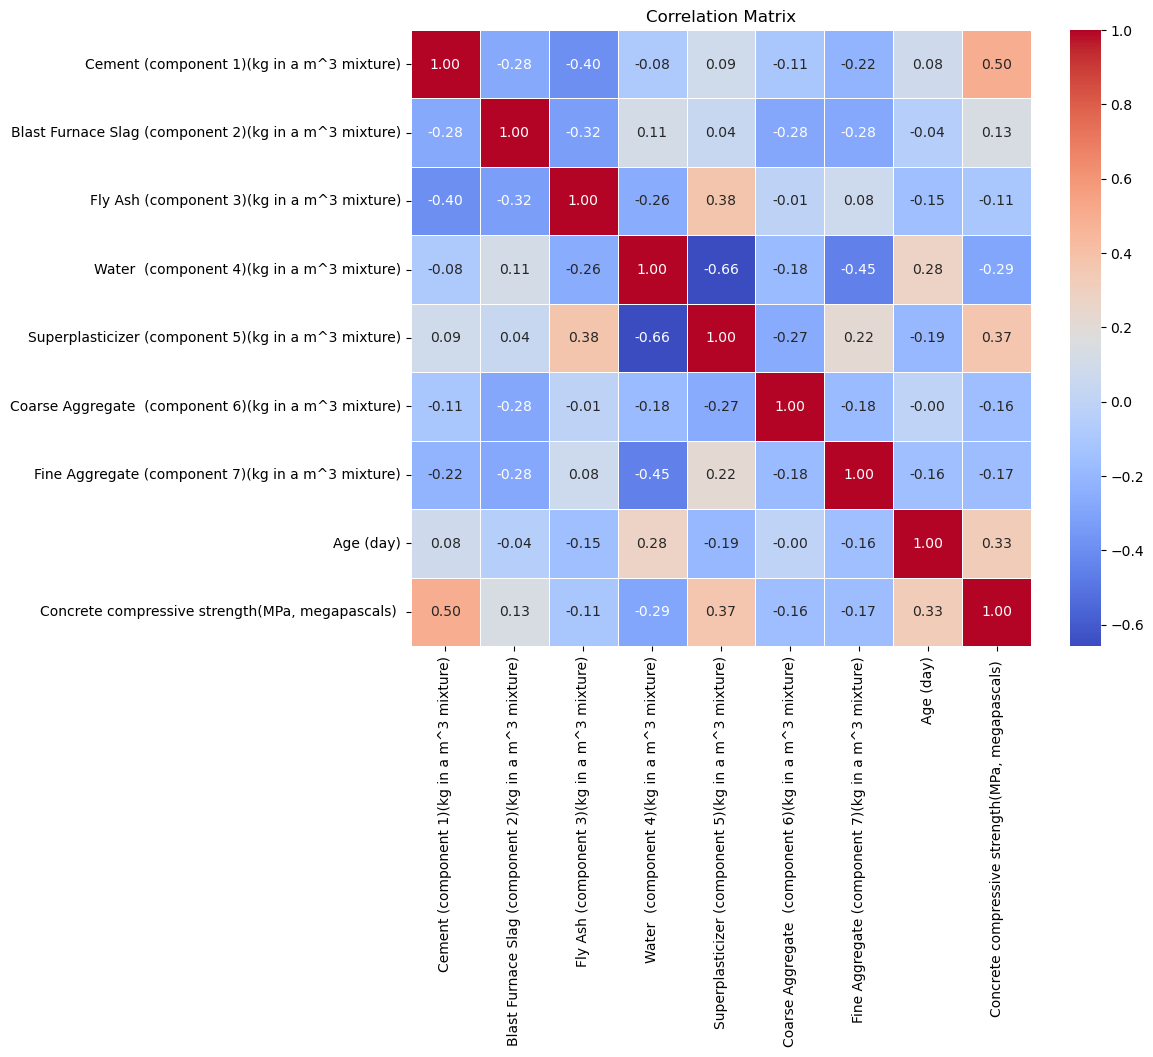

In [8]:
df.columns = df.columns.str.replace(' compressive strength (MPa)', 'strength')

correlation_matrix = df.corr()

correlation_matrix.head()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

   Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0      

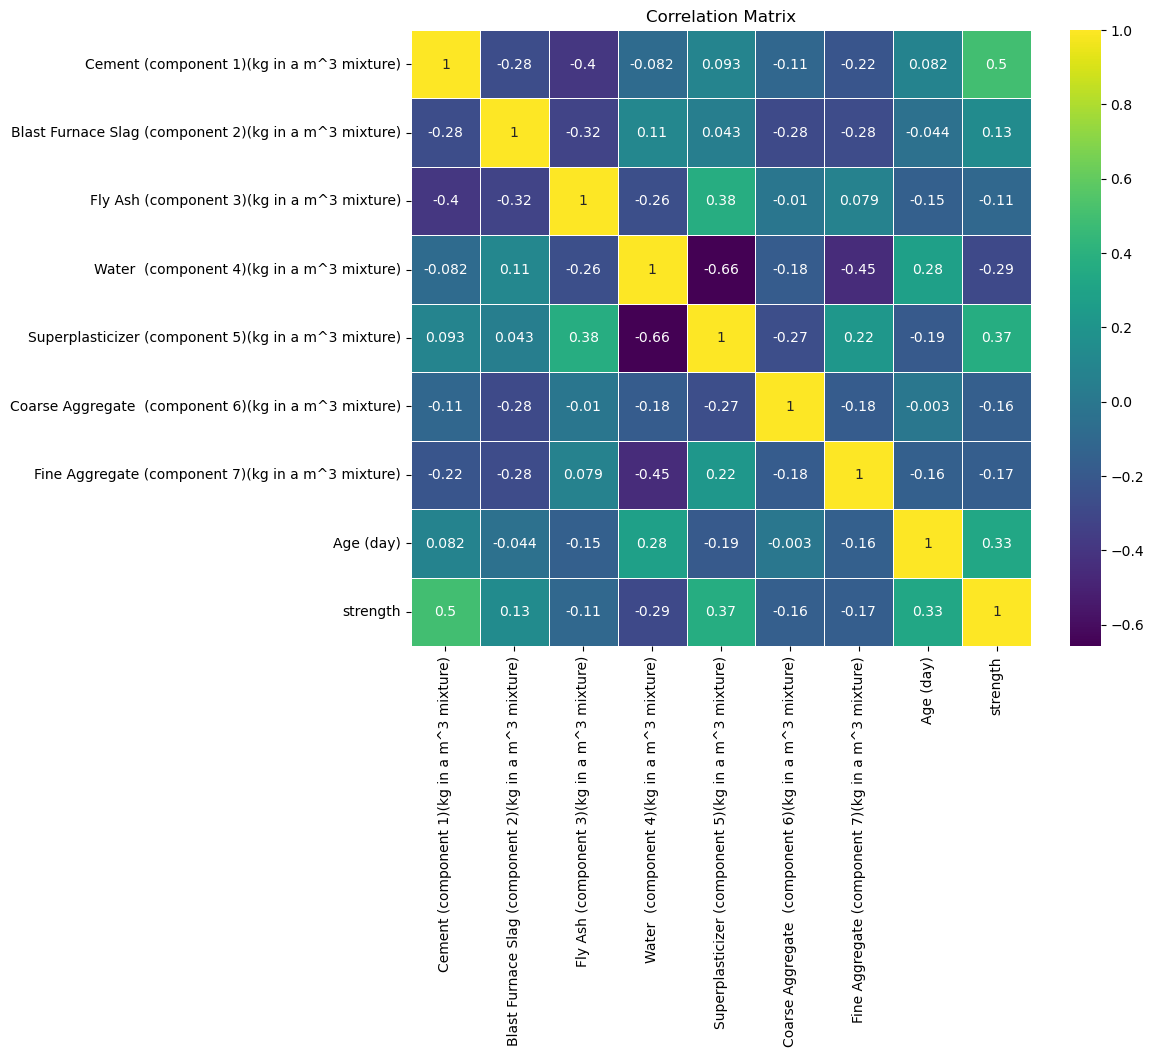

Linear Regression:
Mean Squared Error: 95.97548435337708
R-squared: 0.627541605542902

Decision Tree Regressor:
Mean Squared Error: 53.673239708459036
R-squared: 0.7917067173788096

Support Vector Machine Regressor:
Mean Squared Error: 119.24965703017072
R-squared: 0.5372199880390169


C:\Users\Pegas\AppData\Local\Temp\ipykernel_23536\2791010929.py:138: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


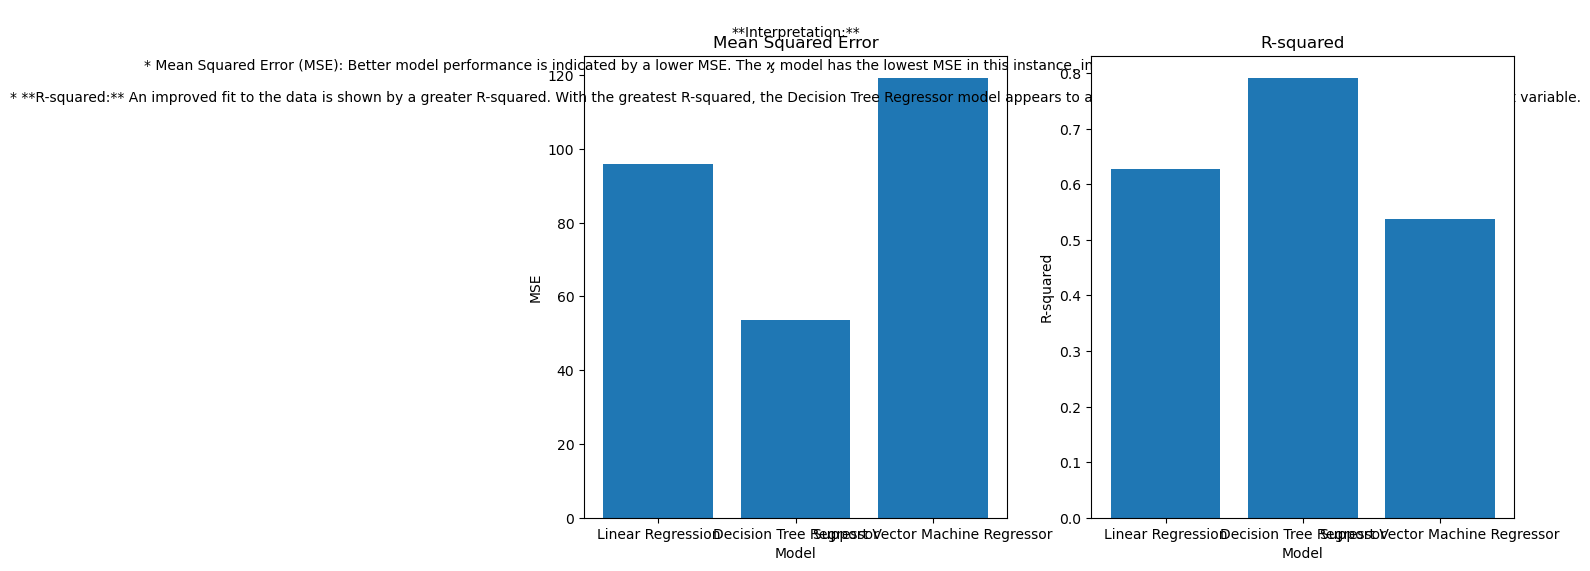

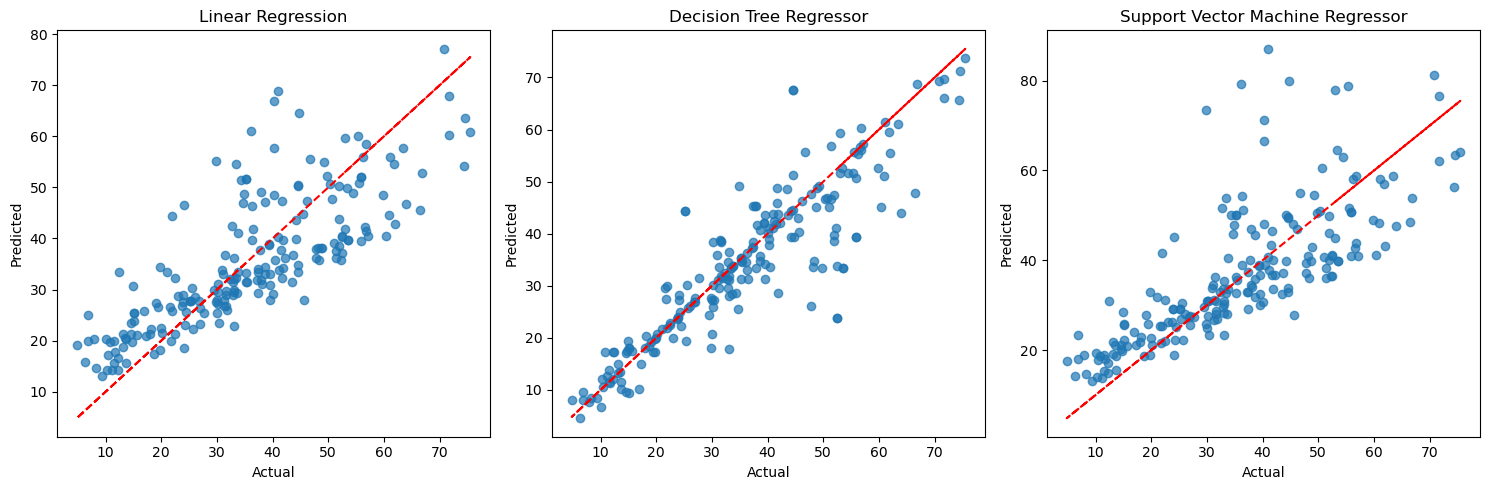

<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Changed file extension from .xsl to .xls or .xlsx (choose the correct one)
df = pd.read_excel('Concrete_Data.xls')

# Rename the last column to 'strength'
df.rename(columns={df.columns[-1]: 'strength'}, inplace=True)

# Print the first five rows of the DataFrame
print(df.head())

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis',
 linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Separate features and target column
X = df.drop('strength', axis=1)
y = df['strength']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = model.predict(X_test_scaled)

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the scaled training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_dt = dt_model.predict(X_test_scaled)

# Create a Support Vector Machine Regressor model
svr_model = SVR(kernel='linear')  # You can experiment with different kernels

# Train the model on the scaled training data
svr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

# Evaluate Decision Tree Regressor model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Evaluate Support Vector Machine Regressor model
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# Print the evaluation results
print("Linear Regression:")
print("Mean Squared Error:", mse_lr)
print("R-squared:", r2_lr)
print("\nDecision Tree Regressor:")
print("Mean Squared Error:", mse_dt)
print("R-squared:", r2_dt)
print("\nSupport Vector Machine Regressor:")
print("Mean Squared Error:", mse_svr)
print("R-squared:", r2_svr)

# Data for the bar plot
models = ['Linear Regression', 'Decision Tree Regressor', 'Support Vector Machine Regressor']
mse_values = [mse_lr, mse_dt, mse_svr]
r2_values = [r2_lr, r2_dt, r2_svr]

# Create the bar plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot MSE values
axs[0].bar(models, mse_values)
axs[0].set_title('Mean Squared Error')
axs[0].set_ylabel('MSE')

# Plot R-squared values
axs[1].bar(models, r2_values)
axs[1].set_title('R-squared')
axs[1].set_ylabel('R-squared')

# Set x-axis labels
for ax in axs:
    ax.set_xlabel('Model')





text = """
**Interpretation:**

* Mean Squared Error (MSE): Better model performance is indicated by a lower MSE. The ϗ model has the lowest MSE in this instance, indicating that it offers the most precise predictions.

* **R-squared:** An improved fit to the data is shown by a greater R-squared. With the greatest R-squared, the {} model appears to account for a greater percentage of the variance in the target variable.

"""




text = text.format(models[np.argmin(mse_values)], models[np.argmax(r2_values)])
axs[0].text(0.5, 1.1, text, transform=axs[0].transAxes, ha="center", va="top")

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Linear Regression
axs[0].scatter(y_test, y_pred, alpha=0.7)
axs[0].plot(y_test, y_test, color='red', linestyle='--')
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# Decision Tree Regressor
axs[1].scatter(y_test, y_pred_dt, alpha=0.7)
axs[1].plot(y_test, y_test, color='red', linestyle='--')
axs[1].set_title('Decision Tree Regressor')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

# Support Vector Machine Regressor
axs[2].scatter(y_test, y_pred_svr, alpha=0.7)
axs[2].plot(y_test, y_test, color='red', linestyle='--')
axs[2].set_title('Support Vector Machine Regressor')
axs[2].set_xlabel('Actual')
axs[2].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

axs[0].text(0.5, 1.1, text, transform=axs[0].transAxes, ha="center", va="top")

plt.tight_layout()
plt.show()


**Interpretation:**

* **Scatter Plot:** The y-axis displays the predicted value, while the x-axis displays the actual value for each data point.
* **Regression Line:** The ideal prediction, when the actual and forecasted values are equal, is shown by the red dashed line.
* **Model Comparison:** Better model performance is shown by a closer match between the regression line and the scatter points.

Linear Regression, Decision Tree Regressor, and Support Vector Machine Regressor are the three models that are represented by scatter plots, which are generated by the code that is given. By contrasting the actual target values (on the x-axis) with the anticipated values (on the y-axis), these plots provide a visual representation of how well each model can perform. If everything goes according to plan, the data points should be grouped together in close proximity to the diagonal red line, which stands for flawless prediction. You are able to visually evaluate which model performs the best by comparing the tightness of these clusters across all three models. The model that has the points distributed closest to the line is likely the model that is the most accurate in predicting the target variable.